#### 기본적으로 사용되는 패키지

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from packages import utils, tokenizer # 사용자 지정 패키지입니다.
from konlpy.tag import Mecab
import seaborn as sns

#### matplotlib 한글 깨짐 해결 코드

In [2]:
# 한글 지원 폰트
sns.set(font='NanumGothic')

# 마이너스 부호 

plt.rcParams['axes.unicode_minus'] = False

## 2.1 데이터 불러오기

In [3]:
dic = utils.load_data_all("./data/ChatbotData.csv")
file_name = list(dic.keys())[0]
data = dic[file_name]

데이터 개수 : 11823
컬럼 개수 : 3
컬럼명 : Index(['Q', 'A', 'label'], dtype='object')


## 2.2 데이터 전처리
- 특수문자 제거
- 결측 데이터 제거

중복 데이터까지 제거하게 되면 너무 많은 데이터의 소실이 생기기 때문에 중복 데이터 제거는 하지 않겠습니다.

### 2.2.1 특수문자 제거

In [4]:
data["pre_Q"] = data["Q"].apply(lambda x: utils.text_prep(x))
data["pre_A"] = data["A"].apply(lambda x: utils.text_prep(x))

### 2.2.2 결측 데이터 제거

In [5]:
data = utils.remove_nan(data)

### 2.2.3 데이터 토큰화

In [6]:
mecab = Mecab()
data["pre_Q"] = data["pre_Q"].apply(lambda x: mecab.morphs(x))
data["pre_A"] = data["pre_A"].apply(lambda x: mecab.morphs(x))

#### 문장별 토큰화된 단어 개수 시각화

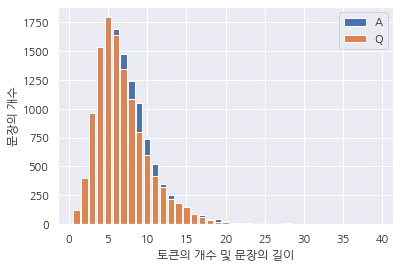

In [7]:
from collections import Counter

data["len_Q"] = data["pre_Q"].apply(lambda x: len(x))
count_len_Q = dict(Counter(data["len_Q"]))
sort_len_Q = sorted(count_len_Q.items(), key = lambda x : x[0])
sort_len_Q = np.array(sort_len_Q)

data["len_A"] = data["pre_A"].apply(lambda x: len(x))
count_len_A = dict(Counter(data["len_A"]))
sort_len_A = sorted(count_len_A.items(), key = lambda x : x[0])
sort_len_A = np.array(sort_len_A)


plt.bar(sort_len_A[:,0], sort_len_A[:,1], label = "A")
plt.bar(sort_len_Q[:,0], sort_len_Q[:,1], label = "Q")
plt.legend()
plt.xlabel("토큰의 개수 및 문장의 길이")
plt.ylabel("문장의 개수")
plt.show()

#### 문장의 길이 20 이상인 데이터 확인하기

In [8]:
more_length = 20
data.loc[(data["len_Q"] > more_length) | (data["len_A"] > more_length), :]

,Q,A,label,pre_Q,pre_A,len_Q,len_A
22,가장 확실한 건 뭘까?,가장 확실한 시간은 오늘이에요. 어제와 내일을 놓고 고민하느라 시간을 낭비하지 마세요.,0,"[가장, 확실, 한, 건, 뭘까, ?]","[가장, 확실, 한, 시간, 은, 오늘, 이, 에요, 어제, 와, 내일, 을, 놓,...",6,23
26,가족 있어?,"저를 만들어 준 사람을 부모님, 저랑 이야기해 주는 사람을 친구로 생각하고 있어요",0,"[가족, 있, 어, ?]","[저, 를, 만들, 어, 준, 사람, 을, 부모, 님, ,, 저, 랑, 이야기, 해...",4,25
27,가족관계 알려 줘,"저를 만들어 준 사람을 부모님, 저랑 이야기해 주는 사람을 친구로 생각하고 있어요",0,"[가족, 관계, 알려, 줘]","[저, 를, 만들, 어, 준, 사람, 을, 부모, 님, ,, 저, 랑, 이야기, 해...",4,25
35,가족이 누구야?,"저를 만들어 준 사람을 부모님, 저랑 이야기해 주는 사람을 친구로 생각하고 있어요",0,"[가족, 이, 누구, 야, ?]","[저, 를, 만들, 어, 준, 사람, 을, 부모, 님, ,, 저, 랑, 이야기, 해...",5,25
588,나는 왜 이렇게 태어났을까?,서로 다르게 태어난 이유는 저마다의 목소리를 내기 위해서예요. 자신의 목소리를 들어...,0,"[나, 는, 왜, 이렇게, 태어났, 을까, ?]","[서로, 다르, 게, 태어난, 이유, 는, 저마다, 의, 목소리, 를, 내, 기, ...",7,22
...,...,...,...,...,...,...,...
11759,하루 종일 붙어 있고 싶어,뭐든 함께하려는 것도 좋겠지만 오래 붙어잇는다고 해서 사랑이 더 커지거나 깊어지지 ...,2,"[하루, 종일, 붙, 어, 있, 고, 싶, 어]","[뭐, 든, 함께, 하, 려는, 것, 도, 좋, 겠, 지만, 오래, 붙, 어, 잇,...",8,28
11769,학원 다른반에 좋아하는 사람이 있는데 번호를 알고 싶은데 방법 좀 알려주세요.,직접 물어보거나 친구를 통해서 알아내보세요.,2,"[학원, 다른, 반, 에, 좋, 아, 하, 는, 사람, 이, 있, 는데, 번호, 를...","[직접, 물, 어, 보, 거나, 친구, 를, 통해서, 알아내, 보, 세요]",23,11
11803,혼자 좋아하는게 이렇게 힘든 적은 처음이에요.,사랑은 더 잘하게 되지 않고 다시 영에서 시작하니 모두 처음이겠죠.,2,"[혼자, 좋아하, 는, 게, 이렇게, 힘든, 적, 은, 처음, 이, 에요]","[사랑, 은, 더, 잘, 하, 게, 되, 지, 않, 고, 다시, 영, 에서, 시작,...",11,21
11810,확실히 좋아하는 데도 관심 있는거 티 안내려고 선톡 안하고 일부러 늦게 보내고 그러...,많이 있어요.,2,"[확실히, 좋, 아, 하, 는, 데, 도, 관심, 있, 는, 거, 티, 안, 내, ...","[많이, 있, 어요]",32,3


#### 문장의 길이 2 미만인 데이터 확인하기

In [9]:
less_length = 2
data.loc[(data["len_Q"] < less_length) | (data["len_A"] < less_length), :]

,Q,A,label,pre_Q,pre_A,len_Q,len_A
118,건방져,기분이 나쁘셨나봐요.,0,[건방져],"[기분, 이, 나쁘, 셨, 나, 봐요]",1,6
123,겁난다,용기 내보세요.,0,[겁난다],"[용기, 내보, 세요]",1,3
157,결혼하면 좋아?,해봐요.,0,"[결혼, 하, 면, 좋, 아, ?]",[해봐요],6,1
165,결혼해야 하나,해봐요.,0,"[결혼, 해야, 하나]",[해봐요],3,1
293,굿모닝,좋은 아침이에요.,0,[굿모닝],"[좋, 은, 아침, 이, 에요]",1,5
...,...,...,...,...,...,...,...
8992,고백,성공하길 바랄게요.,2,[고백],"[성공, 하, 길, 바랄, 게요]",1,5
9547,너 생각이 났어.,어머나,2,"[너, 생각, 이, 났, 어]",[어머나],5,1
9864,사랑꾼,부러워요.,2,"[사랑, 꾼]",[부러워요],2,1
11205,좋아하는 애한테 찌르기 눌러 버림.,아이쿠.,2,"[좋, 아, 하, 는, 애, 한테, 찌르, 기, 눌러, 버림]",[아이쿠],10,1


토큰의 개수가 너무 적거나 너무 많다고 이상한 문장이 포함되어 있는 것은 아닌 것으로 판단되기 때문에 가능한 모든 데이터를 사용하도록 하겠습니다.

#### 토큰화 사전 생성

In [11]:
max_length = max(max(data["len_Q"]), max(data["len_A"]))
raw_data = pd.concat([data["Q"], 
                      data["A"]], 
                     axis = 0)
raw_data = raw_data.drop_duplicates(keep = "first").reset_index(drop=True) # 중복제거
raw_data = raw_data.apply(lambda x : mecab.morphs(x))
vocab_dictionary = tokenizer.bin_dict(raw_data)
vocab_size = len(vocab_dictionary)
print(f"단어장 크기 : {vocab_size}")
word_index, index_word = tokenizer.word_index(vocab_dictionary, vocab_size)

단어장 크기 : 6853


#### 인코더 디코더 모델의 입출력 형태 지정

In [12]:
data["pre_A"] = data["pre_A"].apply(lambda x : ["<sos>"] + x + ["<eos>"])
data["decoder_input"] = data["pre_A"].apply(lambda x : x[:-1])
data["decoder_output"] = data["pre_A"].apply(lambda x : x[1:])
data["encoder_input"] = data["pre_Q"]

#### 단어들을 사전 id값으로 변환

In [13]:
encoder_input = tokenizer.tokenization(data["encoder_input"], word_index, max_length + 1)
decoder_input = tokenizer.tokenization(data["decoder_input"], word_index, max_length)
decoder_output = tokenizer.tokenization(data["decoder_output"], word_index, max_length)

In [14]:
encoder_input.shape, decoder_input.shape

((11823, 40), (11823, 40))

#### 변환값과 실제 단어 비교

In [15]:
i = 1
print(encoder_input[i])
print([index_word[k] for k in encoder_input[i]])
print(data["encoder_input"][i])
print("\n")
print(decoder_input[i])
print([index_word[k] for k in decoder_input[i]])
print(data["decoder_input"][i])
print("\n")
print(decoder_output[i])
print([index_word[k] for k in decoder_output[i]])
print(data["decoder_output"][i])

[ 260 3031  499  911    9    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]
['1', '지망', '학교', '떨어졌', '어', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']
['1', '지망', '학교', '떨어졌', '어']


[   2  628   15 1594    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]
['<sos>', '위로', '해', '드립니다', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>

#### 훈련셋, 검증셋 나누기

In [16]:
np.random.seed(200)
num_data = len(encoder_input)

range_idx = np.arange(0, num_data)
random_idx = np.random.choice(range_idx, int(num_data * 0.1))
val_idx = np.isin(range_idx, random_idx, invert = False)
train_idx = np.isin(range_idx, random_idx, invert = True)

train_encoder_input = encoder_input[train_idx]
val_encoder_input = encoder_input[val_idx]

train_decoder_input = decoder_input[train_idx]
val_decoder_input = decoder_input[val_idx]

train_decoder_output = decoder_output[train_idx]
val_decoder_output = decoder_output[val_idx]

## 3.1 챗봇 모델 구축

### 3.1.1 Transformer 세부 모듈 구축

#### Positional Encoding

In [66]:
def positional_encoding(pos, d_model):
    
    def cal_agnle(position, i):
        return position / np.power(10000, int(i) / d_model)
    # d_model - dimension 생성
    def get_posi_angle_vec(position):
        return [cal_agnle(position, i) for i in range(d_model)]
    
    # pos - dimension 생성
    sinusoid_table = np.array([get_posi_angle_vec(pos_i) for pos_i in range(pos)])
    
    sinusoid_table[:, 0::2] = np.sin(sinusoid_table[:, 0::2])
    sinusoid_table[:, 1::2] = np.cos(sinusoid_table[:, 0::2])
    return sinusoid_table

(40, 512)


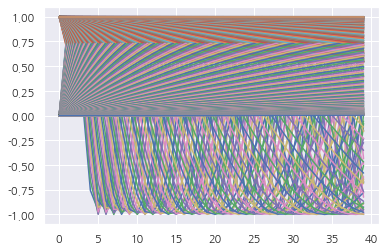

In [18]:
ex = positional_encoding(40, 512)
print(ex.shape)
plt.plot(ex)
plt.show()

#### Masking Function

In [67]:
def generate_padding_mask(seq):
    # 0과 같으면 1 다르면 0을 반환
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    return seq[:, tf.newaxis, tf.newaxis, :]

# attention mask
def generate_casuality_mask(src_len, tgt_len):
    # cumulative sum (누적합)
    # 1 - np.tril(np.ones((src_len, tgt_len)))  동일 결과
    mask = 1 - np.cumsum(np.eye(src_len, tgt_len), 0)
    return tf.cast(mask, tf.float32)

In [20]:
src = encoder_input
tgt = decoder_input
enc_mask = generate_padding_mask(src)
dec_mask = generate_padding_mask(tgt)

dec_casuality_maks = generate_casuality_mask(src.shape[1], tgt.shape[1])
print(dec_casuality_maks)
print(dec_casuality_maks.shape)
print(generate_padding_mask(encoder_input))
print(generate_padding_mask(encoder_input).shape)

tf.Tensor(
[[0. 1. 1. ... 1. 1. 1.]
 [0. 0. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(40, 40), dtype=float32)
(40, 40)
tf.Tensor(
[[[[0. 0. 0. ... 1. 1. 1.]]]


 [[[0. 0. 0. ... 1. 1. 1.]]]


 [[[0. 0. 0. ... 1. 1. 1.]]]


 ...


 [[[0. 0. 0. ... 1. 1. 1.]]]


 [[[0. 0. 0. ... 1. 1. 1.]]]


 [[[0. 0. 0. ... 1. 1. 1.]]]], shape=(11823, 1, 1, 40), dtype=float32)
(11823, 1, 1, 40)


In [68]:
def generate_masks(src, tgt):
    # encdoer 부분의 패딩 마스크
    enc_mask = generate_padding_mask(src)
    
    # decoder 부분의 masked-attention
    dec_mask = generate_padding_mask(tgt)
    dec_casuality_mask = generate_casuality_mask(tgt.shape[1], 
                                                 tgt.shape[1])
    dec_mask = tf.maximum(dec_mask, dec_casuality_mask)
    
    # encoder-decoder 부분의 masked-attention
    dec_enc_casuality_mask = generate_casuality_mask(tgt.shape[1], 
                                                     src.shape[1])
    dec_enc_mask = tf.maximum(enc_mask, dec_enc_casuality_mask)
    
    return enc_mask, dec_enc_mask, dec_mask

In [22]:
enc_mask, dec_enc_mask, dec_mask = generate_masks(encoder_input[:32], 
                                                  decoder_input[:32])
enc_mask.shape, dec_enc_mask.shape, dec_mask.shape

(TensorShape([32, 1, 1, 40]),
 TensorShape([32, 1, 40, 40]),
 TensorShape([32, 1, 40, 40]))

#### Multi-head Attention

In [69]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model
        self.depth = d_model // self.num_heads
        
        self.W_q = tf.keras.layers.Dense(d_model)
        self.W_k = tf.keras.layers.Dense(d_model)
        self.W_v = tf.keras.layers.Dense(d_model)
        
        self.linear = tf.keras.layers.Dense(d_model)
        
    
    # scaling 되어진 dot product attention
    def scaled_dot_product_attention(self, Q, K, V, mask):
        d_k = tf.cast(K.shape[-1], tf.float32)
        QK = tf.matmul(Q, K, transpose_b = True)
        scaled_qk = QK / tf.math.sqrt(d_k)
        
        if mask is not None: scaled_qk += (mask * -1e9)
        
        attentions = tf.nn.softmax(scaled_qk, axis = -1)
        out = tf.matmul(attentions, V)
        
        return out, attentions
    
    
    # multi-head를 만들기 위해서 reshape로 head 나누기
    def split_heads(self, x):
        # x.shape = [데이터의 개수, 문장의 길이, 유닛의 개수]
        bsz = x.shape[0]
        
        split_x = tf.reshape(x, (bsz, -1, self.num_heads, self.depth))
        split_x = tf.transpose(split_x, perm = [0, 2, 1, 3])
        # split_x = [데이터 개수, i번째 Multi-Head, 문장의 길이, 나누어진 유닛의 개수]
        return split_x
    
    
    # 앞서 나눈 Heads을 하나로 합쳐줍니다.
    def combine_heads(self, x):
        bsz = x.shape[0]
        # x = [데이터 개수, i번째 Multi-Head, 문장의 길이, 나누어진 유닛의 개수]
        combined_x = tf.transpose(x, perm = [0, 2, 1, 3])
        # combined_x.shape = [데이터의 개수, 문장의 길이, 유닛의 개수]
        combined_x = tf.reshape(combined_x, (bsz, -1, self.d_model))
        return combined_x
    
    
    def call(self, Q, K, V, mask):
        WQ = self.W_q(Q)
        WK = self.W_q(K)
        WV = self.W_q(V)
        
        WQ_splits = self.split_heads(WQ)
        WK_splits = self.split_heads(WK)
        WV_splits = self.split_heads(WV)
        
        out, attention_weights = self.scaled_dot_product_attention(
            WQ_splits, WK_splits, WV_splits, mask)
        out = self.combine_heads(out)
        out = self.linear(out)
        
        return out, attention_weights

In [24]:
ff = tf.keras.layers.Embedding(vocab_size, 512)
example = ff(src[:32])
print(example.shape)
bsz = example.shape[0]
Q = tf.reshape(example, (bsz, -1, 8, 64))
print(Q.shape)
afaf = tf.transpose(Q, perm = [0, 2, 1, 3])
print(afaf.shape)

(32, 40, 512)
(32, 40, 8, 64)
(32, 8, 40, 64)


#### Postion-wise Feed Forward Network

In [70]:
class PositionFeedForwardNet(tf.keras.layers.Layer):
    def __init__(self, d_model, d_ff):
        super(PositionFeedForwardNet, self).__init__()
        self.d_model = d_model
        self.d_ff = d_ff
        
        self.fc1 = tf.keras.layers.Dense(d_model, activation = "relu")
        self.fc2 = tf.keras.layers.Dense(d_model)
    
    def call(self, x):
        out = self.fc1(x)
        out = self.fc2(out) # 이 부분이 out이 아니라 x 였음 (오타)
        return out

### 3.1.2 인코더 디코더 모델로 만들기

#### Encoder Layer

In [71]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, n_heads, d_ff, dropout):
        super(EncoderLayer, self).__init__()
        
        self.enc_self_attn = MultiHeadAttention(d_model, n_heads)
        self.ffn = PositionFeedForwardNet(d_model, d_ff)
        
        self.norm_1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.norm_2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        
        self.dropout = tf.keras.layers.Dropout(dropout)
        
    
    def call(self, x, mask):
        
        # Multi-Head Attention
        residual = x # skip-connection을 위한 복사본
        out = self.norm_1(x) 
        out, enc_attn = self.enc_self_attn(out, out, out, mask) 
        out = self.dropout(out) 
        out += residual # skip-connection으로 복사해둔 원본 더해주기
        
        # Position-Wise Feed Forward Network
        residual = out # 여기도 복붙한다고 빼먹었네 x 였음 out으로 바꿔야됨 (오타)
        out = self.norm_2(out) # 여기도 복붙한다고 빼먹었네 x 였음 out으로 바꿔야됨 (오타)
        out = self.ffn(out)
        out = self.dropout(out)
        out += residual
        
        return out, enc_attn

In [27]:
encoder = EncoderLayer(24, 8, 10, 0.1)
embedding = tf.keras.layers.Embedding(vocab_size, 24)
example = embedding(encoder_input[:32])
print(example.shape)
enc_out, enc_attn = encoder(example, enc_mask)
print(enc_out.shape)

(32, 40, 24)
(32, 40, 24)


#### Decoder Layer

In [72]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(DecoderLayer, self).__init__()
        
        self.dec_self_attn = MultiHeadAttention(d_model, num_heads)
        self.enc_dec_attn = MultiHeadAttention(d_model, num_heads)
        
        self.ffn = PositionFeedForwardNet(d_model, d_ff)
        
        self.norm_1 = tf.keras.layers.LayerNormalization(epsilon = 1e-6)
        self.norm_2 = tf.keras.layers.LayerNormalization(epsilon = 1e-6)
        self.norm_3 = tf.keras.layers.LayerNormalization(epsilon = 1e-6)
        
        self.dropout = tf.keras.layers.Dropout(dropout)
        
    
    def call(self, x, enc_out, casuality_mask, padding_mask):
        
        # masked multi-head attention
        residual = x
        out = self.norm_1(x)
        out, dec_attn = self.dec_self_attn(out, out, out, padding_mask)
        out = self.dropout(out)
        out += residual
        
        # encdoer-decoder multi head attention
        residual = out
        out = self.norm_2(out)
        # 오타? lms에서는 se.fdec_self_attn으로 되어있음
        out, dec_enc_attn = self.dec_self_attn(out, 
                                              enc_out, 
                                              enc_out, 
                                              casuality_mask)
        out = self.dropout(out)
        out += residual
        
        # Position-Wise Feed Forward Network
        residual = out
        out = self.norm_3(out)
        out = self.ffn(out)
        out = self.dropout(out)
        out += residual
        
        return out, dec_attn, dec_enc_attn

In [29]:
decoder = DecoderLayer(24, 8, 10, 0.1)
embedding_2 = tf.keras.layers.Embedding(vocab_size, 24)
example = embedding_2(decoder_input[:32])
print(example.shape)
dec_out, dec_attn, dec_enc_attn = decoder(example, 
                                          enc_out, 
                                          dec_mask,
                                          dec_enc_mask)
print(dec_out.shape)

(32, 40, 24)
(32, 40, 24)


### 3.1.3 Transformer 모델 구축

#### Encoder

In [73]:
class Encoder(tf.keras.Model):
    def __init__(self, 
                 n_layers,
                 d_model,
                 n_heads,
                 d_ff,
                 dropout):
        super(Encoder, self).__init__()
        self.n_layers = n_layers
        self.enc_layers = [EncoderLayer(d_model, n_heads, d_ff, dropout) 
                           for _ in range(n_layers)]
        self.do = tf.keras.layers.Dropout(dropout) # 오타인지 뭔지 추가
        
    def call(self, x, mask):
        out = x
        
        # n_layer 개수만큼의 encoder-layer를 적용합니다
        enc_attns = list()
        for i in range(self.n_layers):
            out. enc_attn = self.enc_layers[i](out, mask)
            enc_attns.append(enc_attn)
            
        return out, enc_attns

In [31]:
encoder_model = Encoder(3, 24, 8, 256, 0.1)
enc_embedd = tf.keras.layers.Embedding(vocab_size, 24)
print(encoder_input[:32].shape)
enc_example = enc_embedd(encoder_input[:32])
print(enc_example.shape)
enc_out, enc_attn = encoder_model(enc_example, enc_mask)
print(enc_out.shape)

(32, 40)
(32, 40, 24)
(32, 40, 24)


#### Decoder

In [74]:
class Decoder(tf.keras.Model):
    def __init__(self,
                 n_layers,
                 d_model,
                 n_heads,
                 d_ff,
                 dropout):
        super(Decoder, self).__init__()
        self.n_layers = n_layers
        self.dec_layers = [DecoderLayer(d_model, n_heads, d_ff, dropout)
                           for _ in range(n_layers)]
        
    def call(self, x, enc_out, casuality_mask, padding_mask):
        out = x
        
        dec_attns = list()
        dec_enc_attns = list()
        for i in range(self.n_layers):
            out, dec_attn, dec_enc_attn = \
            self.dec_layers[i](out, enc_out, casuality_mask, padding_mask)
            
            dec_attns.append(dec_attn)
            dec_enc_attns.append(dec_enc_attn)
        
        return out, dec_attns, dec_enc_attns

In [34]:
decoder_model = Decoder(3, 24, 8, 256, 0.1)
dec_embedd = tf.keras.layers.Embedding(vocab_size, 24)
dec_example = dec_embedd(decoder_input[:32])
print(dec_example.shape)
print(enc_out.shape)
dec_out, dec_attns, dec_enc_attns = decoder_model(dec_example, 
                                                  enc_out, 
                                                  dec_mask, 
                                                  dec_enc_mask)
print(dec_out.shape)

(32, 40, 24)
(32, 40, 24)
(32, 40, 24)


#### Transformer 전체 모델 조립

In [75]:
class Transformer(tf.keras.Model):
    def __init__(self, 
                 n_layers,
                 d_model,
                 n_heads,
                 d_ff,
                 src_vocab_size,
                 tgt_vocab_size,
                 pos_len,
                 dropout = 0.2,
                 shared_fc = True,
                 shared_embedd = False):
        super(Transformer, self).__init__()
        self.d_model = tf.cast(d_model, tf.float32)
        
        if shared_embedd:
            self.enc_emb = self.dec_emb = \
            tf.keras.layers.Embedding(src_vocab_size, d_model)
        else:
            self.enc_emb = tf.keras.layers.Embedding(src_vocab_size, d_model)
            self.dec_emb = tf.keras.layers.Embedding(tgt_vocab_size, d_model)
        
        self.pos_encoding = positional_encoding(pos_len, d_model)
        self.dropout = tf.keras.layers.Dropout(dropout)
        
        self.encoder = Encoder(n_layers, d_model, n_heads, d_ff, dropout)
        self.decoder = Decoder(n_layers, d_model, n_heads, d_ff, dropout)
        
        self.fc = tf.keras.layers.Dense(tgt_vocab_size)
        
        self.shared_fc = shared_fc
        
        if shared_fc:
            self.fc.set_weights(tf.transpose(self.dec_emb.weights))
            
            
    def embedding(self, emb, x):
        seq_len = x.shape[1]
        
        out = emb(x)
        
        if self.shared_fc: out *= tf.math.sqrt(self.d_model)
        out += self.pos_encoding[np.newaxis, ...][:, :seq_len, :]
        out = self.dropout(out)
        
        return out
    
    
    def call(self, enc_in, dec_in, enc_mask, casuality_mask, dec_mask):
        enc_in = self.embedding(self.enc_emb, enc_in)
        dec_in = self.embedding(self.dec_emb, dec_in)
        
        enc_out, enc_attns = self.encoder(enc_in, enc_mask)
        # 오타였음
        dec_out, dec_attns, dec_enc_attns = \
        self.decoder(dec_in, enc_out, casuality_mask, dec_mask)
        
        logits = self.fc(dec_out)
        
        return logits, enc_attns, dec_attns, dec_enc_attns

In [36]:
positional_encoding(30, 40)[np.newaxis, ...].shape

(1, 30, 40)

In [76]:
transformer = Transformer(
    n_layers=2,
    d_model=512,
    n_heads=8,
    d_ff=2048,
    src_vocab_size=vocab_size,
    tgt_vocab_size=vocab_size,
    pos_len=200,
    dropout=0.1,
    shared_fc=True,
    shared_embedd=True)

d_model = 512
batch_size = 128

In [77]:
enc_mask, casuality_mask, dec_mask = generate_masks(encoder_input[:batch_size], decoder_input[:batch_size])
outputs, enc_attns, dec_attns, dec_enc_attns = transformer(encoder_input[:batch_size], 
                                                           decoder_input[:batch_size], 
                                                           enc_mask, 
                                                           casuality_mask, 
                                                           dec_mask)
transformer.summary()

Model: "transformer_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     multiple                  3508736   
_________________________________________________________________
dropout_36 (Dropout)         multiple                  0         
_________________________________________________________________
encoder_5 (Encoder)          multiple                  2105344   
_________________________________________________________________
decoder_6 (Decoder)          multiple                  2107392   
_________________________________________________________________
dense_258 (Dense)            multiple                  3515589   
Total params: 11,237,061
Trainable params: 11,237,061
Non-trainable params: 0
_________________________________________________________________


In [39]:
outputs = tf.math.softmax(outputs, axis = -1)
print(outputs.shape)

(128, 40, 6853)


#### Learning Rate Scheduler & Optimizer

In [78]:
class LearningRateScheduler(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps = 4000):
        super(LearningRateScheduler, self).__init__()
        
        self.d_model = d_model
        self.warmup_steps = warmup_steps
    
    def __call__(self, step):
        arg1 = step ** -0.5
        arg2 = step * (self.warmup_steps ** -1.5)
        
        return (self.d_model ** -0.5) * tf.math.minimum(arg1, arg2)

In [79]:
learning_rate = LearningRateScheduler(d_model)
optimizer = tf.keras.optimizers.Adam(learning_rate,
                                     beta_1 = 0.9,
                                     beta_2 = 0.98,
                                     epsilon = 1e-9)

#### Loss Function 정의

In [80]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits = True, reduction = 'none')
def loss_function(real, pred):
    # tf.math.equal(array, 지정값) : 지정값과 같으면 True 틀리면 False
    # tf.math.logical_not : 원소들이 True는 False로 False면 True로 바꿔줌
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)
    
    mask = tf.cast(mask, dtype = loss_.dtype)
    loss_ *= mask
    
    #  divide by zero encountered in true_divide 로 인하여 loss가 nan으로 가는걸 막기 위해서 1e-6이라는 작은 수를 더함
    return tf.reduce_sum(loss_) / tf.reduce_sum(mask)

In [60]:
print(outputs.shape, decoder_output[:batch_size].shape)
real = decoder_output[:batch_size]
pred = outputs
print(real.shape, pred.shape)
print(loss_function(real, pred))

(128, 40, 6853) (128, 40)
(128, 40) (128, 40, 6853)
tf.Tensor(9.128787, shape=(), dtype=float32)


## 3.2 챗봇 모델 훈련

#### 모델 학습 train step 정의

In [81]:
@tf.function()
def train_step(enc_in, dec_in, dec_out, model, optimizer):
    
    enc_mask, dec_enc_mask, dec_mask = generate_masks(enc_in, dec_in)
    
    with tf.GradientTape() as tape:
        predictions, enc_attns, dec_attns, dec_enc_attns = \
        model(enc_in, dec_in, enc_mask, dec_mask, dec_enc_mask)
        predictions = tf.math.softmax(predictions, axis = -1)
        loss = loss_function(dec_out, predictions)
        
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    return loss, enc_attns, dec_attns, dec_enc_attns

In [82]:
from tqdm import tqdm_notebook

batch_size = 128
epochs = 1

for epoch in range(epochs):
    total_loss = 0
    
    idx_list = list(range(0, encoder_input.shape[0], batch_size))
    np.random.shuffle(idx_list)
    t = tqdm_notebook(idx_list)
    
    for batch, idx in enumerate(t):
        batch_loss, enc_attns, dec_attns, dec_enc_attns = \
        train_step(train_encoder_input[idx:idx+batch_size],
                   train_decoder_input[idx:idx+batch_size],
                   train_decoder_output[idx:idx+batch_size],
                   transformer,
                   optimizer)
        total_loss += batch_loss
    
        t.set_description_str('Epoch %2d' % (epoch + 1))
        t.set_postfix_str('Loss %.4f' % (total_loss.numpy() / batch + 1))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


  0%|          | 0/93 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide


KeyboardInterrupt: 

## 3.3 챗봇 모델 평가

### 3.3.1 SmoothinFunction이 적용된 BLEU score 정의

In [69]:
from nltk.translate.bleu_score import SmoothingFunction, sentence_bleu

#!pip install nltk # nltk가 설치되어 있지 않은 경우 주석 해제
reference = "많 은 자연어 처리 연구자 들 이 트랜스포머 를 선호 한다".split()
candidate = "적 은 자연어 학 개발자 들 가 트랜스포머 을 선호 한다 요".split()

print("원문:", reference)
print("번역문:", candidate)
print("BLEU Score:", sentence_bleu([reference], candidate))

원문: ['많', '은', '자연어', '처리', '연구자', '들', '이', '트랜스포머', '를', '선호', '한다']
번역문: ['적', '은', '자연어', '학', '개발자', '들', '가', '트랜스포머', '을', '선호', '한다', '요']
BLEU Score: 8.190757052088229e-155


In [70]:
def calculate_bleu(reference, candidate, weights=[0.25, 0.25, 0.25, 0.25]):
    return sentence_bleu([reference],
                         candidate,
                         weights=weights,
                         smoothing_function=SmoothingFunction().method1)  # smoothing_function 적용

print("BLEU-1:", calculate_bleu(reference, candidate, weights=[1, 0, 0, 0]))
print("BLEU-2:", calculate_bleu(reference, candidate, weights=[0, 1, 0, 0]))
print("BLEU-3:", calculate_bleu(reference, candidate, weights=[0, 0, 1, 0]))
print("BLEU-4:", calculate_bleu(reference, candidate, weights=[0, 0, 0, 1]))

print("\nBLEU-Total:", calculate_bleu(reference, candidate))

BLEU-1: 0.5
BLEU-2: 0.18181818181818182
BLEU-3: 0.010000000000000004
BLEU-4: 0.011111111111111112

BLEU-Total: 0.05637560315259291


### 3.3.2 모델 평가 함수 정의

In [71]:
def evaluate(sentence, model, word_index, index_word):
    if type(sentence) == str:
        sentence = mecab.morphs(sentence)
        sentence = tokenizer.tokenization([sentence], word_index, max_length + 1)
    

    ids = []
    output = [["<sos>"]]
    output = tokenizer.tokenization(output, word_index, max_length + 1)
    for i in range(train_decoder_input.shape[-1]):
        enc_padding_mask, combined_mask, dec_padding_mask = \
        generate_masks(sentence, output)

        predictions, enc_attns, dec_attns, dec_enc_attns = \
        model(sentence, 
              output,
              enc_padding_mask,
              dec_padding_mask,
              combined_mask)
        prediction_id = tf.math.softmax(predictions, axis = -1)
        prediction_id = tf.argmax(prediction_id[0, -1]).numpy().item()
        

        ids.append(prediction_id)
        try:
            output[0,i+1] = prediction_id
        except:
            break
        if word_index["<eos>"] == prediction_id:
            break

    
    return sentence, output, enc_attns, dec_attns, dec_enc_attns

sentence = "나는 배가 고프다."
inputs, outputs, enc_attns, dec_attns, dec_enc_attns = evaluate(sentence, transformer, word_index, index_word)

### 3.3.3 모델 BLEU 점수로 평가

In [72]:
from tqdm import tqdm

def eval_bleu(val_encoder_input, val_decoder_output):
    total_score = []
    for i, j in tqdm(zip(val_encoder_input, val_decoder_output)):
        i = np.array([i])
        enc_inputs, dec_outputs, enc_attns, dec_attns, dec_enc_attns = evaluate(i, transformer, word_index, index_word)
        score = calculate_bleu(j, dec_outputs[0])
        total_score.append(score)
    return total_score

result = eval_bleu(val_encoder_input[:10], val_decoder_output[:10])
mean_bleu = np.mean(result)
print(result)
print(f"평균 BLEU 점수 : {mean_bleu}")

10it [00:21,  2.16s/it]

[0.004620856909230222, 0, 0.004620856909230222, 0, 0, 0, 0.004620856909230222, 0, 0, 0.009771922616581639]
0.0023634493344272304


In [73]:
print(f"평균 BLEU 점수 : {mean_bleu}")

평균 BLEU 점수 : 0.0023634493344272304
